## Example of performing linear least squares fitting

First we import numpy and matplotlib as usual

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Now, let's generate some random data avout a trend line

In [14]:
#set a random number seed
np.random.seed(119)

#set number of data points 
npoints = 50

#set x
x = np.linspace(0,10.,npoints)

#set slope, intercept, and scarrer rms
m = 2.0
b = 1.0
sigma = 2.0

#generate y points 
y = m*x + b + np.random.normal(scale=sigma,size=npoints)
y_err = np.full(npoints,sigma)

# Just plot the data!

Text(0, 0.5, 'y')

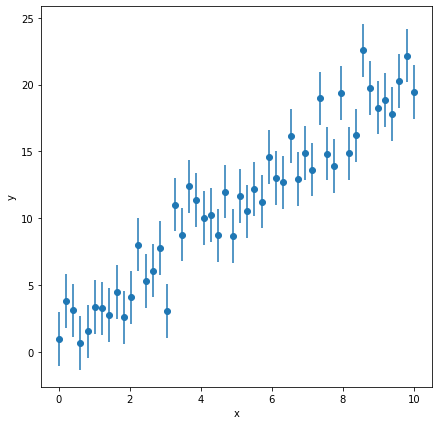

In [15]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

## Method #1, polyfit()

In [16]:
m_fit, b_fit = np.poly1d(np.polyfit(x,y,1,w=1./y_err))
print("Best fit slope = ",m_fit)
print("Best fit intercept = ",b_fit)

y_fit = m_fit*x + b_fit

Best fit slope =  1.9634043470399505
Best fit intercept =  1.283010681296193


### Plot result

1.9634043470399505
1.283010681296193


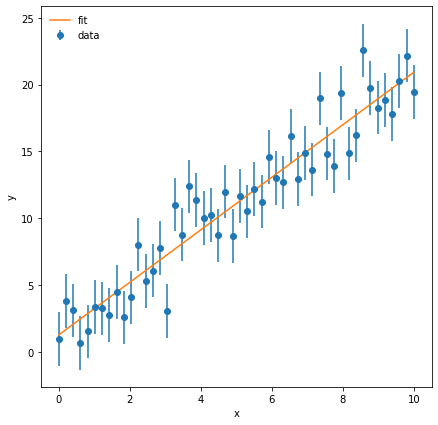

In [17]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o',label='data')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y_fit,label='fit')
plt.legend(loc=2,frameon=False)
print(m_fit)
print(b_fit)

## Method #2, scipy + optimize

In [18]:
#import optimize from scipy
from scipy import optimize

#define the function to fit
def f_line(x, m, b):
    return m*x + b

#perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err)

m_fit_2 = params[0]
b_fit_2 = params[1]
print(m_fit_2, b_fit_2)

1.9634043457508432 1.2830106890542259


In [19]:
print(m_fit, b_fit)

1.9634043470399505 1.283010681296193


Text(0.5, 1.0, 'Using optimize.curve_fit')

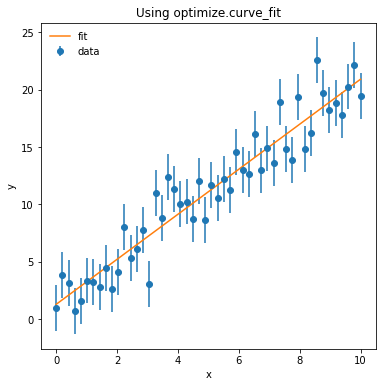

In [22]:
f = plt.figure(figsize=(6,6))
plt.errorbar(x,y,sigma,fmt='o',label='data')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,m_fit_2*x + b_fit_2,label='fit')
plt.legend(loc=2,frameon=False)
plt.title("Using optimize.curve_fit")